# Appliances Energy Prediction

<i>By</i>

<b> Yichong Tang (yt1368) </b> <i> and </i> <b> Shruthi Nemu Tandel (snt288) </b>

<i> Foundations of Data Science CS-GY 6053 <br/>New York University, Tandon School of Engineering </i>

### Data Fetching and Cleaning

In [1]:
# importing necessary libraries.

import pandas as pd
from pandas import Series
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.api import qqplot

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the input data
input_df = pd.read_csv('energydata_complete.csv')


In [3]:
# Printing first 5 rows of our data
input_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Checking if there are any null values. 
input_df.isnull().values.any()
#type(input_df['date'])

False

In [5]:
# finding correlatin matrix of all the attributes
input_df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


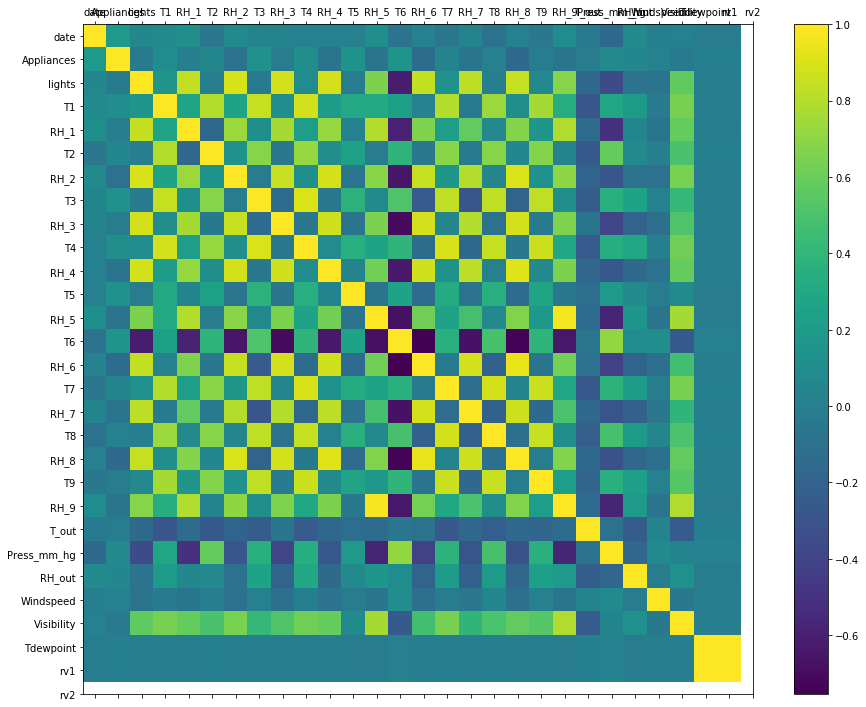

In [6]:
#  Plot correlation matrix
plt.figure(figsize=(15, 12))
plt.matshow(input_df.corr(), fignum = 1)
plt.xticks(range(len(input_df.columns)), input_df.columns)
plt.yticks(range(len(input_df.columns)), input_df.columns)
plt.colorbar()
plt.show()

### Logistic regression for Feature selection

In [7]:
from sklearn.linear_model import LogisticRegression

# convert datetime to the seconds from 1970-01-01 00:00:00 and store it in column 'ts'
input_df['date'] = pd.to_datetime(input_df['date'])
input_df['ts'] = input_df.date.values.astype(np.int64)
m = LogisticRegression().fit(input_df.drop(columns=['Appliances', 'date']), input_df['Appliances'])

# find the feature that has the greatest feature importance
input_df.drop(columns=['Appliances', 'date']).columns[np.argmax(abs(m.coef_[0]))]

'ts'

In [8]:
# Since it is our time series model, we first convert the date column which is a string to datetime datatype and set is as the index column

input_df = input_df.iloc[:,0:2]
input_df = input_df.set_index('date')
input_df.tail()

,Appliances
date,
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270
2016-05-27 17:50:00,420
2016-05-27 18:00:00,430


Since the most important feature is ts, which means datetime has most impact on the Appliances, we decide to do time-series forecasting.

Text(0,0.5,'Energy usage in Wh')

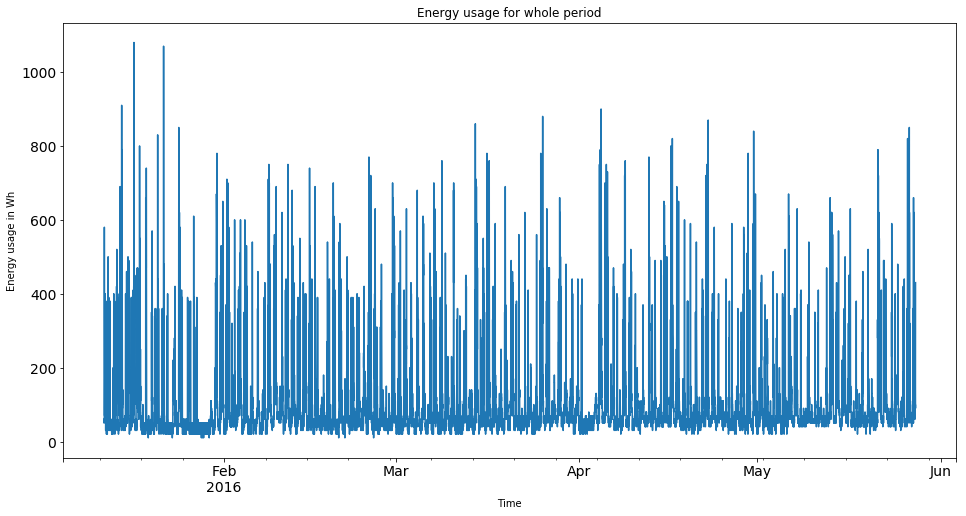

In [9]:
# Visualizing data

input_df.index.name=None
input_df['Appliances'].plot(figsize=(16,8), title= 'Energy usage for whole period', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Energy usage in Wh')

Text(0,0.5,'Energy usage in Wh')

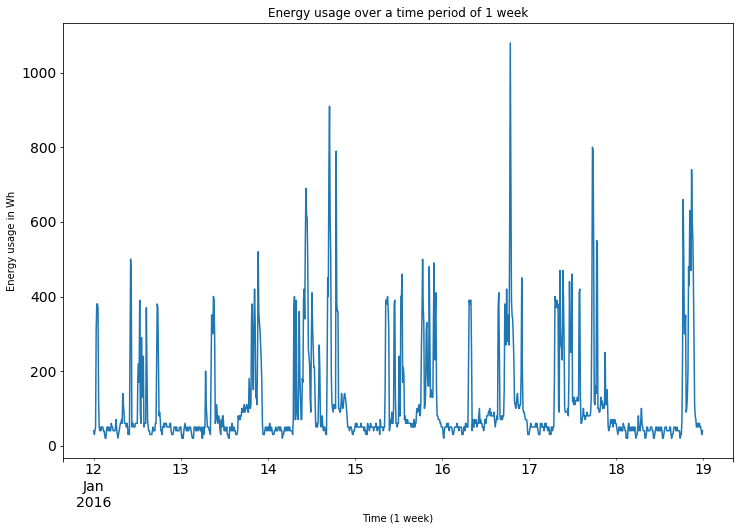

In [10]:
# Visualizing energy usage for a week to get a clear view of data distribution
input_df.Appliances['2016-01-12':'2016-01-18'].plot(figsize=(12,8), title= 'Energy usage over a time period of 1 week',fontsize=14)
plt.xlabel('Time (1 week)')
plt.ylabel('Energy usage in Wh')
# X = input_df.values
# X = np.log(X)

Text(0.5,1,'Appliances energy consumption distribution')

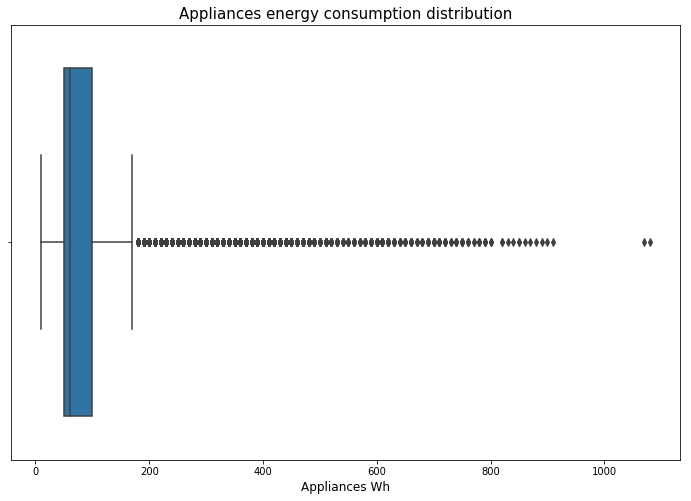

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Appliances", data=input_df)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

In the boxplot, the median is represented with a thick black line inside the blue rectangle. It has a value of around 60 to 70 Wh. The lower whisker has a value of 10 Wh and the upper whisker has a value of 170 Wh. It also shows that the data above the median is more dispersed and that there are several outliers(marked withthe round circles above the upper whisker).

### Stationarity of Data

**We can check if the data is stationary by reviewing summary staistics**

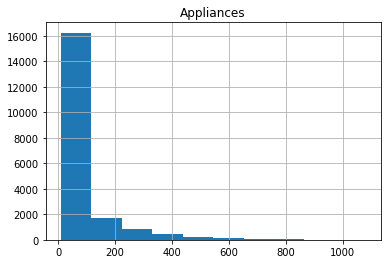

In [12]:
# Visualizing data by plotting histogram. It shows the frequency of energy consumption for each interval(bar width)

input_df.hist()
pyplot.show()

Reviewing the plot of the time series , we can see that there is an obvious seasonality component, and it looks like the seasonality component is decreasing.

This may suggest an exponential decrease from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

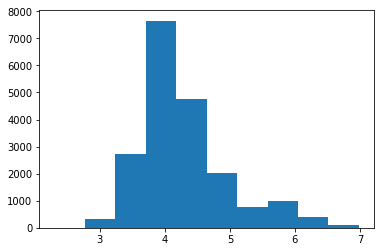

In [13]:
# taking log 

X = input_df.values
X = np.log(X)
pyplot.hist(X)
pyplot.show()


Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution
Running the example plots a histogram of values from the time series. We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

In [14]:
# We can split time series into two (or more) partitions and compare the mean and variance of each group. 
# If they differ and the difference is statistically significant, the time series is likely non-stationary.

# mean and variance with log

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.265413, mean2=4.341997
variance1=0.513461, variance2=0.345048


In [15]:
# mean and variance without log

X = input_df.values
split = len(X) / 2
split = int(split)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=98.509172, mean2=96.880827
variance1=11866.177148, variance2=9154.275623


As we can see from the above results, the differnce in mean and variance is neglibile. To make sure that it's not a statistical fluke and  confirm the stationarity of data we  now plot** Rolling mean and Rolling standard deviation and also run Augmented Dickey Fuller test** on our data.

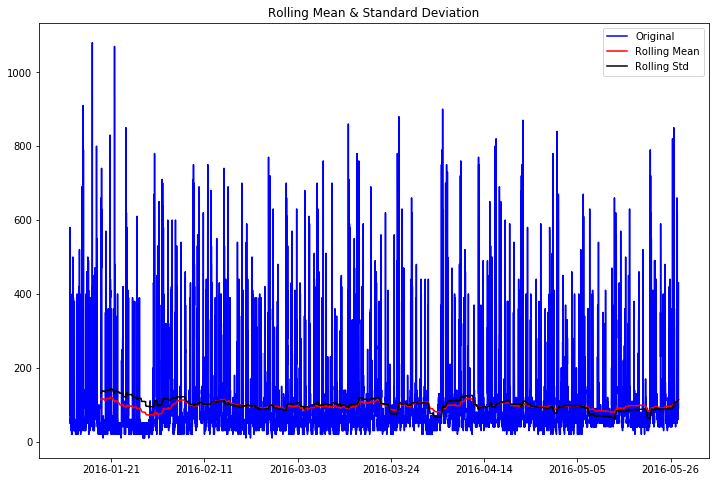

Results of Dickey-Fuller Test:
Test Statistic                   -21.616378
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19723.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64


In [16]:
# without log

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
#     Determing rolling statistics
    rolmean = timeseries.rolling(center=False, window = 1008).mean() # ,weekly seasonal data 6*24*7
    rolstd = timeseries.rolling(center=False, window = 1008).std()

#     Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
#     Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.Appliances, autolag='AIC') # gives the exact values actual values and analyzes difference between them
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(input_df)

We can see that the mean and std variations have small variations with time.
Also, the Dickey-Fuller test statistic value of -21.61 is less than the value of -3.431 at 1%.
This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).
Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.
Since p-value>=0.05, we can reject the null hypothesis, the data does not have a unit root and is stationary.

In [17]:
#Splitting data into Train and test data
train = input_df.iloc[:np.int64(len(input_df)*0.75)]
test = input_df.iloc[np.int64(len(input_df)*0.75):]

### STL Decomposition

#### In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

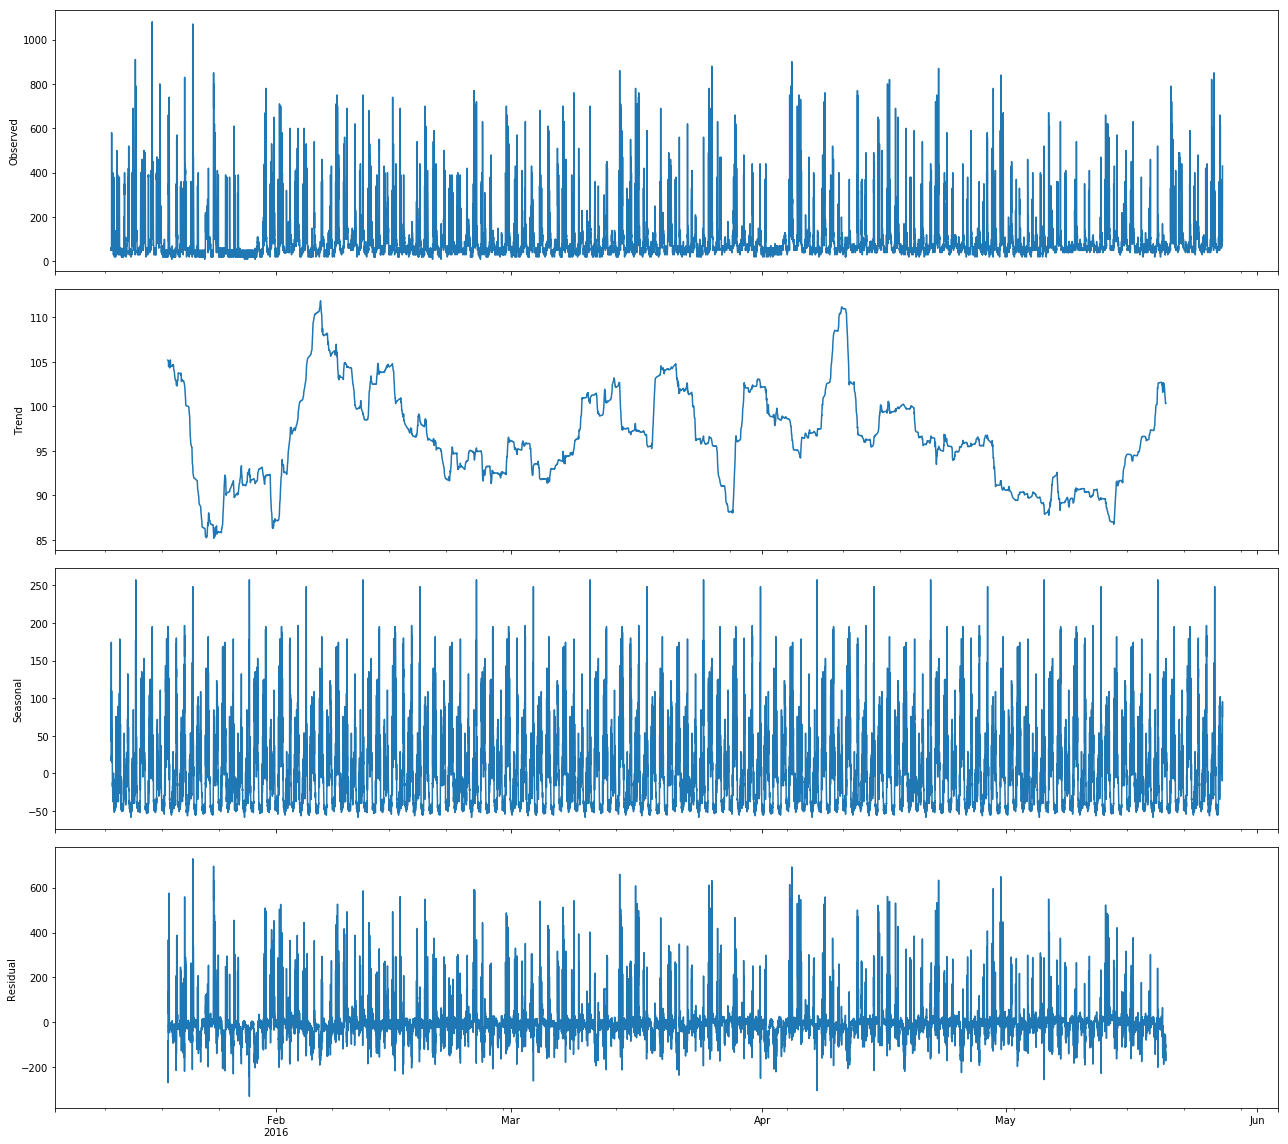

In [18]:

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

decompfreq = 6*24*14 # frequency is in weeks
result = seasonal_decompose(input_df, freq=decompfreq, model='additive')
rcParams['figure.figsize'] = 18, 16
fig = result.plot()
pyplot.show()

residual = result.resid
seasonal = result.seasonal
trend = result.trend

We now model the residuals.

In [19]:
# Checking if there are any null values. 
residual.isnull().values.any()

True

In [20]:
# dopping NaN values
residual.dropna(inplace=True)

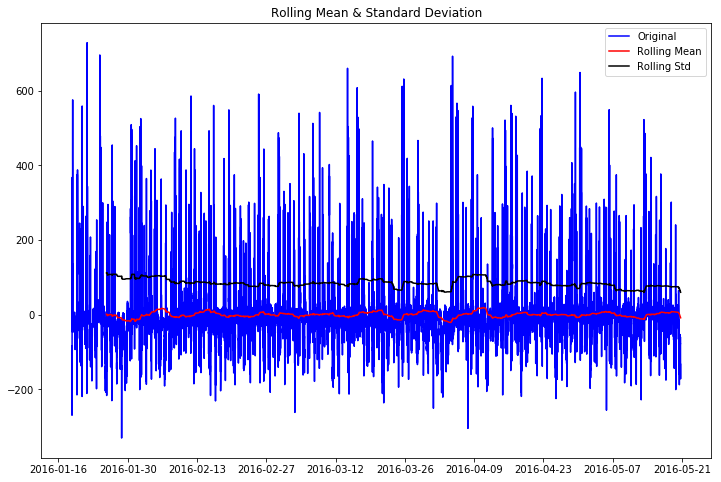

Results of Dickey-Fuller Test:
Test Statistic                   -21.632516
p-value                            0.000000
#Lags Used                        12.000000
Number of Observations Used    17706.000000
Critical Value (1%)               -3.430719
Critical Value (5%)               -2.861703
Critical Value (10%)              -2.566857
dtype: float64


In [21]:
# checking stationarity of residual
    
test_stationarity(residual)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

### Plotting ACF and PACF

We plot ACF and PACF graphs to determine p and q parameters and then we pass  to ARIMA model

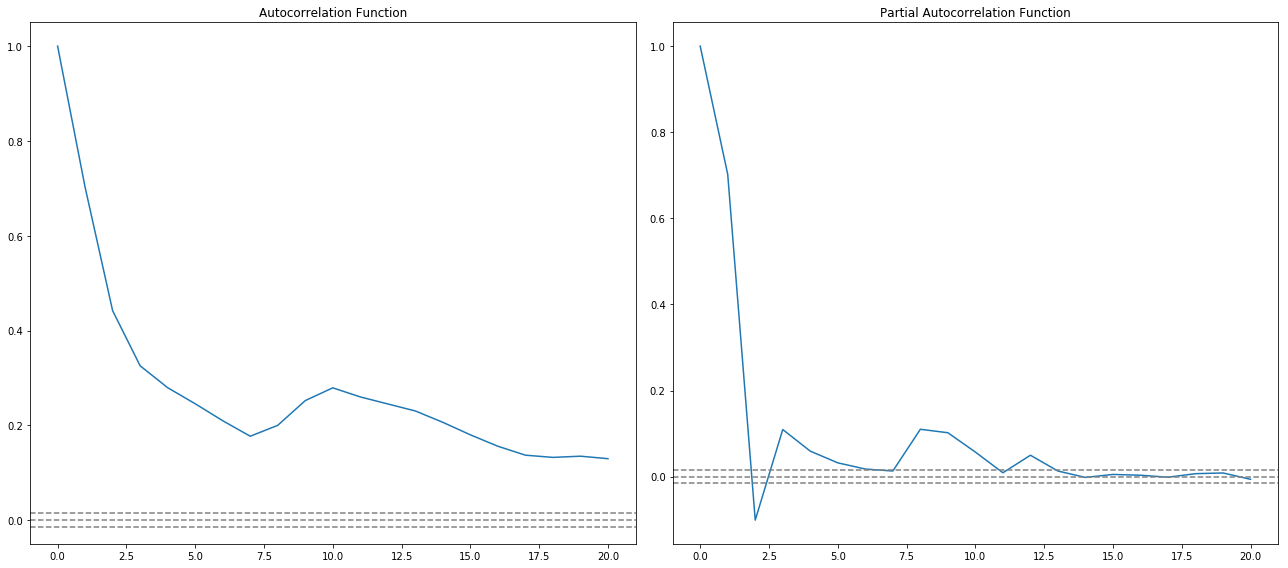

In [22]:
from statsmodels.tsa.stattools import acf, pacf

ts_column = residual['Appliances']

acf_cases = acf(ts_column, nlags = 20)
pacf_cases = pacf(ts_column, nlags = 20, method = 'ols')

rcParams['figure.figsize'] = 18, 8
plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

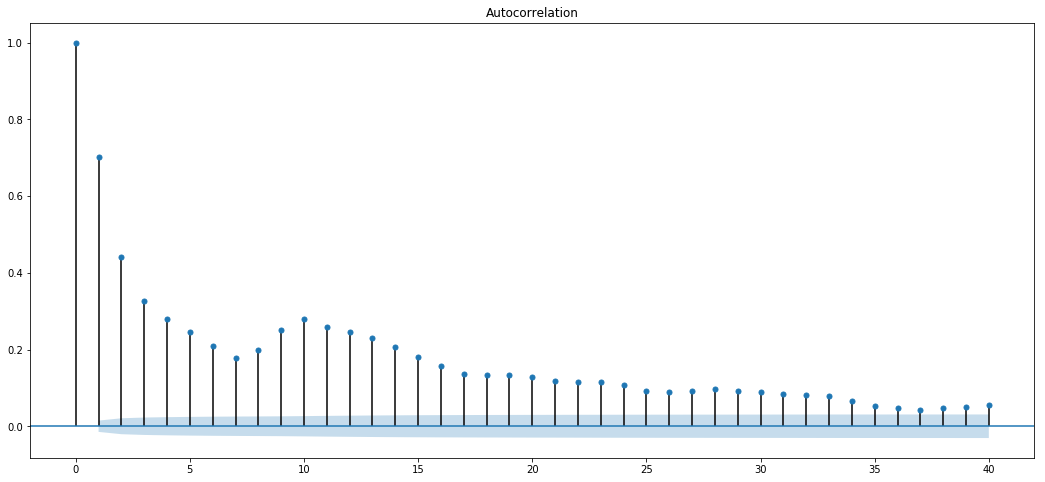

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig_first = plot_acf(ts_column, lags = 40)

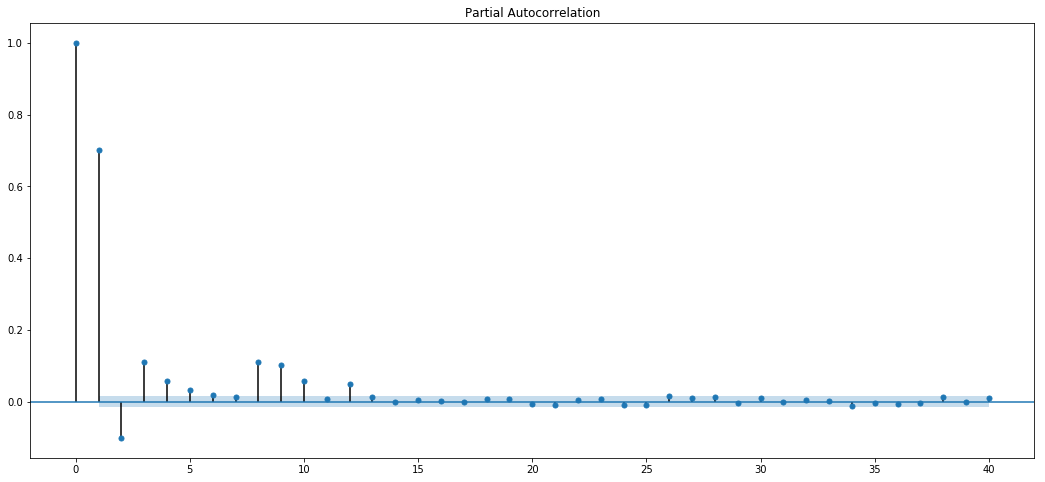

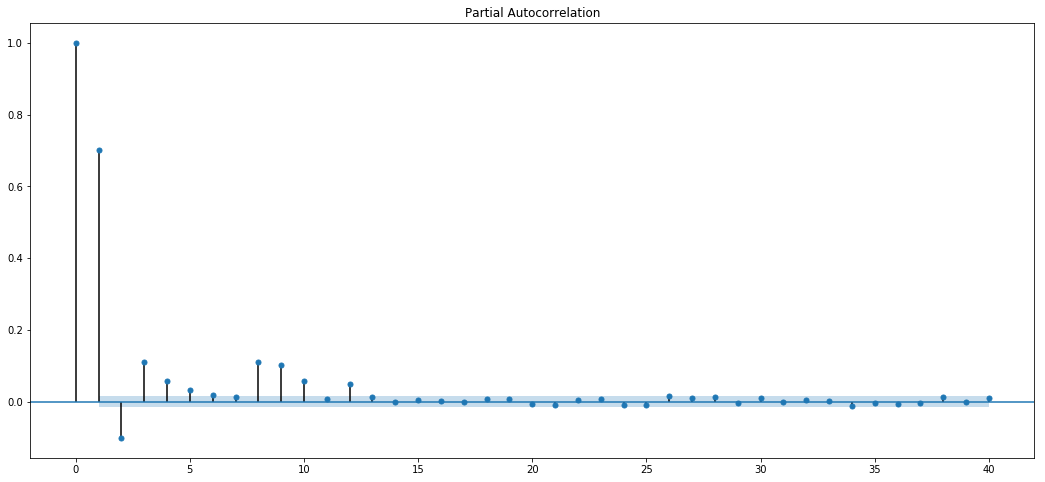

In [24]:
fig2 = plot_pacf(ts_column, lags = 40)

### Implementing ARIMA model

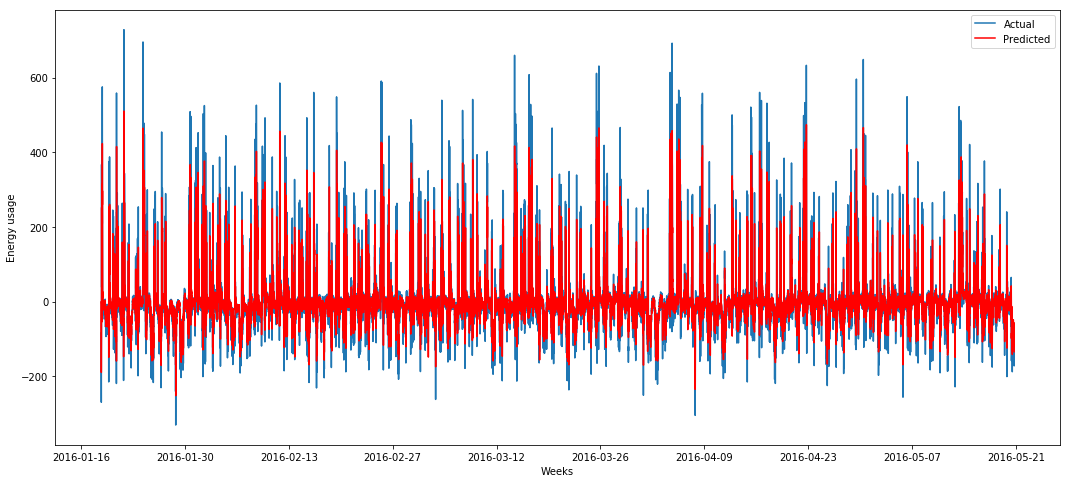

In [25]:
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# new_appliances = ts_column.astype(float)
# model_AR = ARIMA(new_appliances, order=(2, 0, 0))
model_AR = ARIMA(residual.Appliances, order=(2, 0, 2))
# results_AR = model_AR.fit(disp = False, trend = 'c')
results_AR = model_AR.fit()
plt.plot(ts_column, label = 'Actual')
plt.plot(results_AR.fittedvalues, color='red', label = 'Predicted')
plt.xlabel("Weeks")
plt.ylabel("Energy usage")
plt.legend(loc = "best")

### Prediction

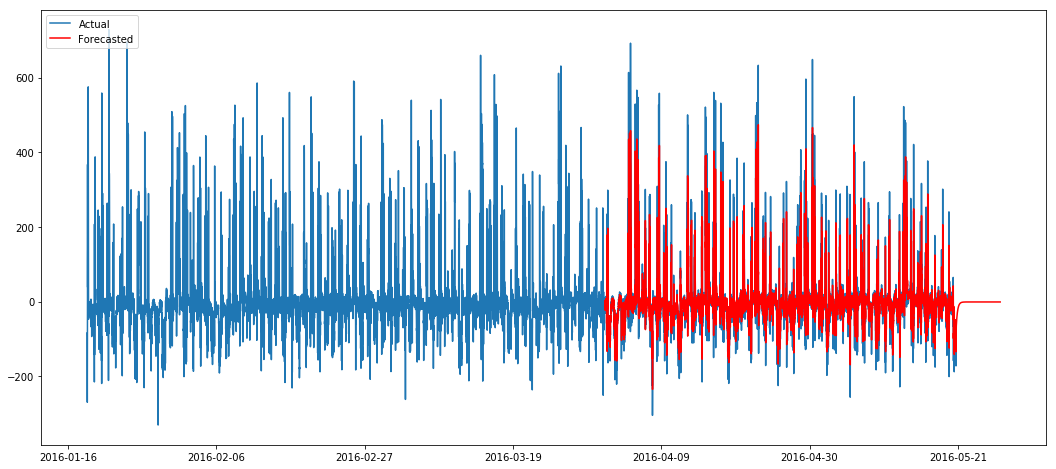

In [26]:
prediction = results_AR.predict(start = '2016-04-01', end= '2016-05-27')

plt.plot(residual, label = 'Actual')
plt.plot(prediction, color = 'red', label = 'Forecasted')
plt.legend(loc = "upper left")

### Implementing Exponential Smoothing Model

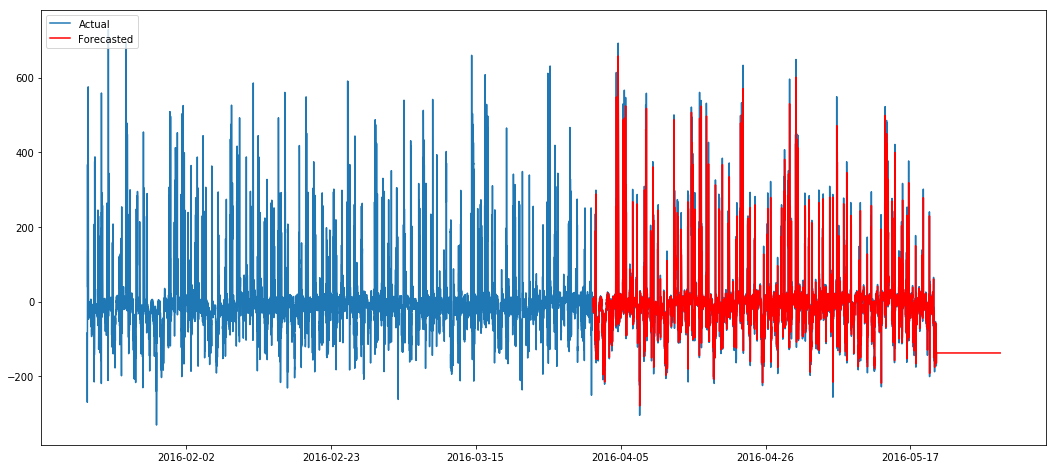

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# create class
ets_model = SimpleExpSmoothing(residual)
# fit model
ets_fit = ets_model.fit()
# make prediction
yhat = ets_fit.predict(start = '2016-04-01', end= '2016-05-30')

plt.plot(residual, label = 'Actual')
plt.plot(yhat, color = 'red', label = 'Forecasted')
plt.legend(loc = "upper left")

In [28]:
new_seasonal = seasonal.shift(6*24*7)
new_seasonal = new_seasonal.dropna()
new_seasonal

,Appliances
2016-01-18 17:00:00,22.181821
2016-01-18 17:10:00,16.614691
2016-01-18 17:20:00,24.381722
2016-01-18 17:30:00,67.694387
2016-01-18 17:40:00,158.777390
2016-01-18 17:50:00,174.308144
2016-01-18 18:00:00,85.403823
2016-01-18 18:10:00,42.065529
2016-01-18 18:20:00,58.734125
2016-01-18 18:30:00,57.641201


In [29]:
prediction = results_AR.fittedvalues.add(new_seasonal.Appliances,fill_value=0)

In [30]:
prediction = prediction.add([np.mean(trend)]*len(prediction),fill_value=0)

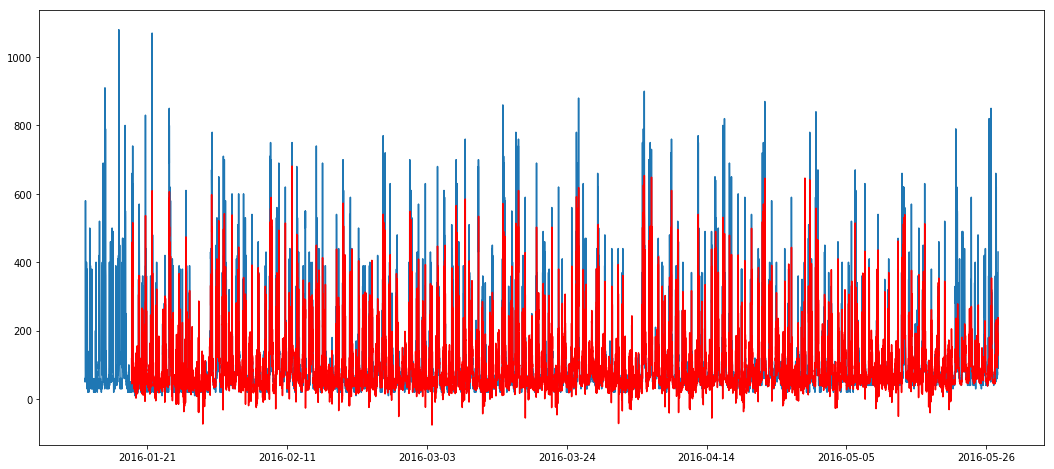

In [31]:
plt.plot(input_df, label = 'Actual')
plt.plot(prediction, color='red', label = 'Predicted')

### Evaluation Results

In [32]:
mae = (abs(input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)).mean()
rmse = (((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).mean())**0.5
mean = input_df[-3000:-2000].Appliances.values.mean()
r2 = 1 - ((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).sum() / ((mean - prediction[-3000:-2000].values)**2).sum()
mape = (abs((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values) / input_df[-3000:-2000].Appliances.values)).mean()

In [33]:
evaluation = pd.DataFrame(data=[[mae,rmse,r2.Appliances,mape]],index=['ETS'], columns=['MAE','RMSE','R-Square','MAPE'])
evaluation

,MAE,RMSE,R-Square,MAPE
ETS,37.214103,65.619087,0.272189,0.410524


In [34]:
prediction = results_AR.fittedvalues.add(new_seasonal.Appliances,fill_value=0)
prediction = prediction.add([np.mean(trend)]*len(prediction),fill_value=0)

In [35]:
mae = (abs(input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)).mean()
rmse = (((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).mean())**0.5
mean = input_df[-3000:-2000].Appliances.values.mean()
r2 = 1 - ((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).sum() / ((mean - prediction[-3000:-2000].values)**2).sum()
mape = (abs((input_df[-3000:-2000].Appliances.values - prediction[-3000:-2000].values) / input_df[-3000:-2000].Appliances.values)).mean()

In [37]:
evaluation_ = pd.DataFrame(data=[[mae,rmse,r2.Appliances,mape]],index=['ARIMA'], columns=['MAE','RMSE','R-Square','MAPE'])
evaluation = evaluation.append(evaluation_)
evaluation

,MAE,RMSE,R-Square,MAPE
ETS,37.214103,65.619087,0.272189,0.410524
ARIMA,37.214103,65.619087,0.272189,0.410524
ARIMA,37.214103,65.619087,0.272189,0.410524
